## Process upwelling indices 


In [1]:
# setup 

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np
import xarray as xr
import os
import netCDF4 
import datetime as dt 


In [17]:
path = '/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/data/upwelling_indices/'
files = os.listdir(path)

files

['BEUTI_daily.nc', 'CUTI_daily.nc', 'BEUTI_monthly.nc', 'CUTI_monthly.nc']

In [18]:
# CUTI for volume transport
# BEUTI for nitrate flux 

fn = 'BEUTI_daily.nc'
S = netCDF4.Dataset(path+fn) 
S

<class 'netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Creation Date: 23-Apr-2025 09:13:37
    Description: Daily Biologically Effective Upwelling Transport Index (BEUTI) for U.S. West Coast
    Reference: Jacox et al. (2018), Coastal upwelling revisited: Ekman, Bakun, and improved upwelling indices for the U.S. west coast, Journal of Geophysical Research, 123(10), 7332-7350, https://doi.org/10.1029/2018JC014187
    dimensions(sizes): time(13626), latitude(17)
    variables(dimensions): float64 year(time), float64 month(time), float64 day(time), float64 time(time), float64 latitude(latitude), float64 BEUTI(time, latitude)
    groups: 

In [38]:
S['time']

<class 'netCDF4.Variable'>
float64 time(time)
    _CoordinateAxisType: Time
    axis: T
    calendar: gregorian
    long_name: Time
    units: days since 1970-01-01
    time_origin: 01-JAN-1970
unlimited dimensions: 
current shape = (13626,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [20]:
S['time'].units 

'days since 1970-01-01'

In [39]:
time = S['time'][:]
s0 = dt.datetime(1970,1,1)
dates = np.array([s0+dt.timedelta(tt) for tt in time])
dates

idx = np.where([dd.year > 2021 for dd in dates])[0] 

In [76]:
# save variables 

time = S['time'][:].data
s0 = dt.datetime(1970,1,1)
dates = np.array([s0+dt.timedelta(tt) for tt in time])
lat = S['latitude'][:].data
BEUTI = S['BEUTI'][:].data

# make climatology from 1994 - 2024 (30 years) 

idx = np.where([dd.year >= 1994 for dd in dates])[0] 

# find latitude 34, 35, 36

idx_34 = np.where(lat==34)[0][0]
idx_35 = np.where(lat==35)[0][0]
idx_36 = np.where(lat==36)[0][0]

b34 = BEUTI[:,idx_34]
b35 = BEUTI[:,idx_35]
b36 = BEUTI[:,idx_36]

# make a climatology if you want but extra work 



In [63]:
# doy climatology 

num_years = dates[-1].year - dates[0].year
doy_climatology = np.ones((num_years+1,366))*np.nan

start_year = dates[0].year

for ii,dd in enumerate(dates): 
    # extract the day number of the year
    doy = dd.timetuple().tm_yday - 1
    this_year = dd.year
    year_idx = this_year - start_year 
    # select 35 latitude beuti score at given date and save in doy_climatology 
    doy_climatology[year_idx,doy] = BEUTI[ii,idx_35]


doy_mean = np.nanmean(doy_climatology,axis=0)
doy_std = np.nanstd(doy_climatology,axis=0)




In [72]:
yoi = 2022 # year of interest 
yeardays = [dt.datetime(yoi, 1, 1) + dt.timedelta(int(days) - 1) for days in doy_array]

yeardays

[datetime.datetime(2022, 1, 1, 0, 0),
 datetime.datetime(2022, 1, 2, 0, 0),
 datetime.datetime(2022, 1, 3, 0, 0),
 datetime.datetime(2022, 1, 4, 0, 0),
 datetime.datetime(2022, 1, 5, 0, 0),
 datetime.datetime(2022, 1, 6, 0, 0),
 datetime.datetime(2022, 1, 7, 0, 0),
 datetime.datetime(2022, 1, 8, 0, 0),
 datetime.datetime(2022, 1, 9, 0, 0),
 datetime.datetime(2022, 1, 10, 0, 0),
 datetime.datetime(2022, 1, 11, 0, 0),
 datetime.datetime(2022, 1, 12, 0, 0),
 datetime.datetime(2022, 1, 13, 0, 0),
 datetime.datetime(2022, 1, 14, 0, 0),
 datetime.datetime(2022, 1, 15, 0, 0),
 datetime.datetime(2022, 1, 16, 0, 0),
 datetime.datetime(2022, 1, 17, 0, 0),
 datetime.datetime(2022, 1, 18, 0, 0),
 datetime.datetime(2022, 1, 19, 0, 0),
 datetime.datetime(2022, 1, 20, 0, 0),
 datetime.datetime(2022, 1, 21, 0, 0),
 datetime.datetime(2022, 1, 22, 0, 0),
 datetime.datetime(2022, 1, 23, 0, 0),
 datetime.datetime(2022, 1, 24, 0, 0),
 datetime.datetime(2022, 1, 25, 0, 0),
 datetime.datetime(2022, 1, 26, 0,

In [75]:
b35.shape

(1207,)

NameError: name 'cruise1_start' is not defined

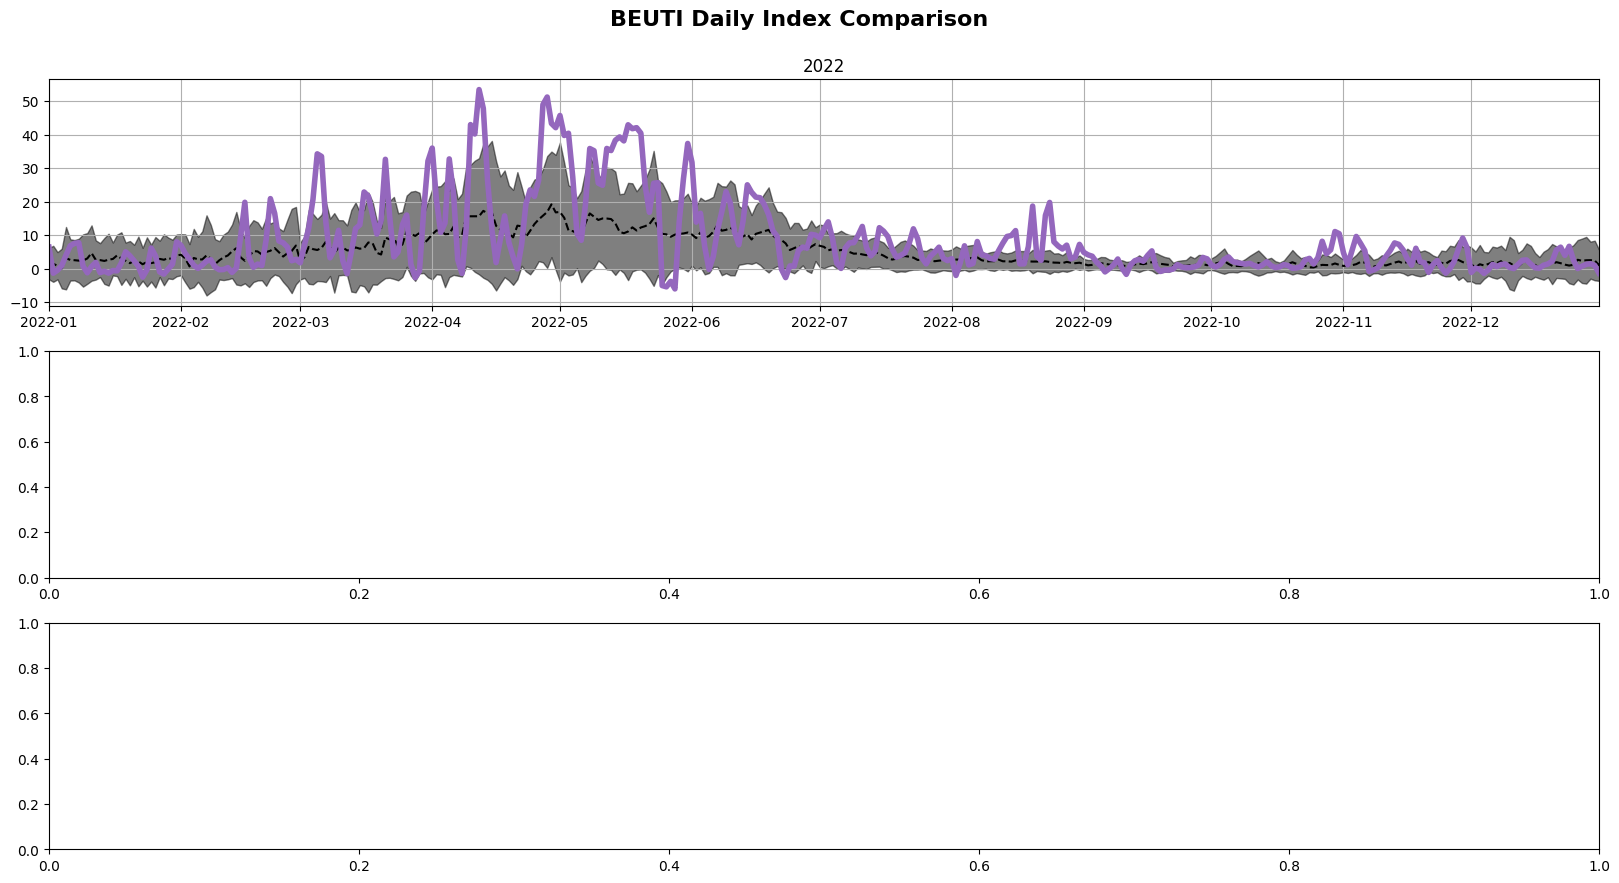

In [78]:
fig,axes = plt.subplots(3,1,figsize=(20,10))
plt.suptitle('BEUTI Daily Index Comparison',fontsize=16,y=0.95,fontweight='bold') 

# 2022 
yoi = 2022 # year of interest 
ax = axes[0] 
ax.set_title('2022') 
ax.grid()

# climatology 
yeardays = [dt.datetime(yoi, 1, 1) + dt.timedelta(int(days) - 1) for days in doy_array]
ax.plot(yeardays, doy_mean, label='BEUTI Climatology', color = 'k', ls = '--') 
ax.fill_between(x=yeardays, y1=doy_mean-doy_std, y2=doy_mean+doy_std, color='k', alpha = 0.5) 

# beuti 
ax.plot(dates[y2022],b35[y2022],color='tab:purple',label='Lat 35',lw=4)
ax.xaxis.set_major_locator(mdates.MonthLocator()); # ax.xaxis.set_major_formatter(" ")
#ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)

datemin = dt.datetime(2022,1,1); datemax = dt.datetime(2022,12,31)
ax.set_xlim(datemin, datemax)

# add cruise shading 
ax.fill_between(dates[y2022], 0, 1, where = np.where((dates[y2022] >= cruise1_start) & (dates[y2022] <= cruise1_end))[0], color='blue', alpha = 0.5, transform=ax.get_xaxis_transform(), label='Cruise dates')

ax.legend()


In [81]:
# doy climatology 

num_years = dates[-1].year - dates[0].year
doy_climatology = np.ones((num_years+1,366))*np.nan
doy_array = np.arange(1,367)

start_year = dates[0].year

for ii,dd in enumerate(dates): 
    # extract the day number of the year
    doy = dd.timetuple().tm_yday - 1
    this_year = dd.year
    year_idx = this_year - start_year 
    # select 35 latitude beuti score at given date and save in doy_climatology 
    doy_climatology[year_idx,doy] = BEUTI[ii,idx35]


doy_mean = np.nanmean(doy_climatology,axis=0)
doy_std = np.nanstd(doy_climatology,axis=0)


In [84]:
dates[y2022].shape

(365,)

In [85]:
(dates[y2022] <= cruise1_start).shape

(365,)

In [89]:
cruise1 = np.zeros(len(dates[y2022]))
cruise1[np.where((dates[y2025] >= cruise3_start) & (dates[y2025] <= cruise3_end))] = 1
cruise1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

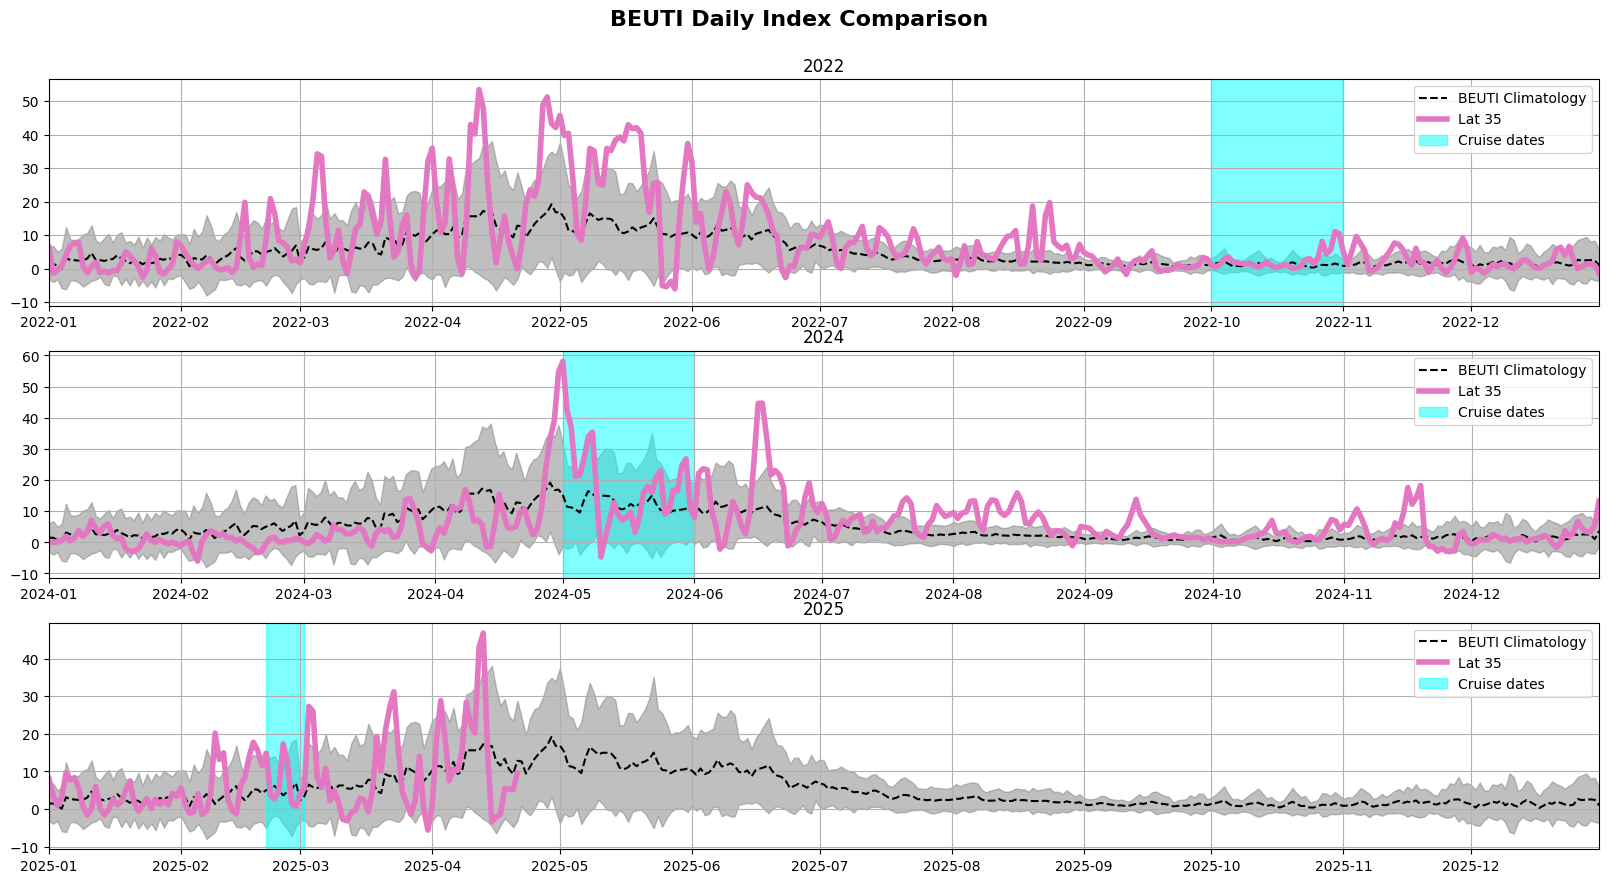

In [91]:

# split into years 

y2022 = np.where([dd.year == 2022 for dd in dates])[0] 
y2023 = np.where([dd.year == 2023 for dd in dates])[0] 
y2024 = np.where([dd.year == 2024 for dd in dates])[0] 
y2025 = np.where([dd.year == 2025 for dd in dates])[0] 


cruise1_start = dt.datetime(2022,10,1)
cruise1_end = dt.datetime(2022,11,1)
cruise1 = np.zeros(len(dates[y2022]))
cruise1[np.where((dates[y2022] >= cruise1_start) & (dates[y2022] <= cruise1_end))] = 1

cruise2_start = dt.datetime(2024,5,1)
cruise2_end = dt.datetime(2024,6,1)
cruise2 = np.zeros(len(dates[y2024]))
cruise2[np.where((dates[y2024] >= cruise2_start) & (dates[y2024] <= cruise2_end))] = 1

cruise3_start = dt.datetime(2025,2,21)
cruise3_end = dt.datetime(2025,3,2)
cruise3 = np.zeros(len(dates[y2025]))
cruise3[np.where((dates[y2025] >= cruise3_start) & (dates[y2025] <= cruise3_end))] = 1


# plot 
myFmt = mdates.DateFormatter('%Y\n%m-%d')
myFmt = mdates.DateFormatter('%b-%d')


fig,axes = plt.subplots(3,1,figsize=(20,10))
plt.suptitle('BEUTI Daily Index Comparison',fontsize=16,y=0.95,fontweight='bold') 

fillcolor = 'gray' 
bcolor = 'tab:pink'
ccolor = 'cyan'

# 2022 
yoi = 2022 # year of interest 
ax = axes[0] 
ax.set_title('2022') 
ax.grid()

# climatology 
yeardays = [dt.datetime(yoi, 1, 1) + dt.timedelta(int(days) - 1) for days in doy_array]
ax.plot(yeardays, doy_mean, label='BEUTI Climatology', color = 'k', ls = '--') 
ax.fill_between(x=yeardays, y1=doy_mean-doy_std, y2=doy_mean+doy_std, color=fillcolor, alpha = 0.5) 
# beuti 
ax.plot(dates[y2022],b35[y2022],color=bcolor,label='Lat 35',lw=4)
ax.xaxis.set_major_locator(mdates.MonthLocator()); # ax.xaxis.set_major_formatter(" ")
#ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
datemin = dt.datetime(2022,1,1); datemax = dt.datetime(2022,12,31)
ax.set_xlim(datemin, datemax)
# add cruise shading 
ax.fill_between(dates[y2022], 0, 1, where = cruise1>0, color=ccolor, alpha = 0.5, transform=ax.get_xaxis_transform(), label='Cruise dates')
ax.legend()


# 2024 
yoi = 2024 # year of interest 
ax = axes[1] 
ax.set_title('2024') 
ax.grid()
# climatology 
yeardays = [dt.datetime(yoi, 1, 1) + dt.timedelta(int(days) - 1) for days in doy_array]
ax.plot(yeardays, doy_mean, label='BEUTI Climatology', color = 'k', ls = '--') 
ax.fill_between(x=yeardays, y1=doy_mean-doy_std, y2=doy_mean+doy_std, color=fillcolor, alpha = 0.5) 
# beuti 
ax.plot(dates[y2024],b35[y2024],color=bcolor,label='Lat 35',lw=4)
ax.xaxis.set_major_locator(mdates.MonthLocator()); # ax.xaxis.set_major_formatter(" ")
#ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
datemin = dt.datetime(2024,1,1); datemax = dt.datetime(2024,12,31)
ax.set_xlim(datemin, datemax)
# add cruise shading 
ax.fill_between(dates[y2024], 0, 1, where = cruise2>0, color=ccolor, alpha = 0.5, transform=ax.get_xaxis_transform(), label='Cruise dates')
ax.legend()


# 2025 
yoi = 2025 # year of interest 
ax = axes[2] 
ax.set_title('2025') 
ax.grid()
# climatology 
yeardays = [dt.datetime(yoi, 1, 1) + dt.timedelta(int(days) - 1) for days in doy_array]
ax.plot(yeardays, doy_mean, label='BEUTI Climatology', color = 'k', ls = '--') 
ax.fill_between(x=yeardays, y1=doy_mean-doy_std, y2=doy_mean+doy_std, color=fillcolor, alpha = 0.5) 
# beuti 
ax.plot(dates[y2025],b35[y2025],color=bcolor,label='Lat 35',lw=4)
ax.xaxis.set_major_locator(mdates.MonthLocator()); # ax.xaxis.set_major_formatter(" ")
#ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
datemin = dt.datetime(2025,1,1); datemax = dt.datetime(2025,12,31)
ax.set_xlim(datemin, datemax)
# add cruise shading 
ax.fill_between(dates[y2025], 0, 1, where = cruise3>0, color=ccolor, alpha = 0.5, transform=ax.get_xaxis_transform(), label='Cruise dates')
ax.legend()

plt.show()

In [92]:
save_loc = '/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/figures/'
fig.savefig(save_loc+'beuti_cruisedates.png',dpi=300)

In [23]:
# select variables for time range 2022 and on 

idx = np.where([dd.year >= 2022 for dd in dates])[0] 

time = time[idx]
dates = dates[idx]
beuti = BEUTI[idx,:]



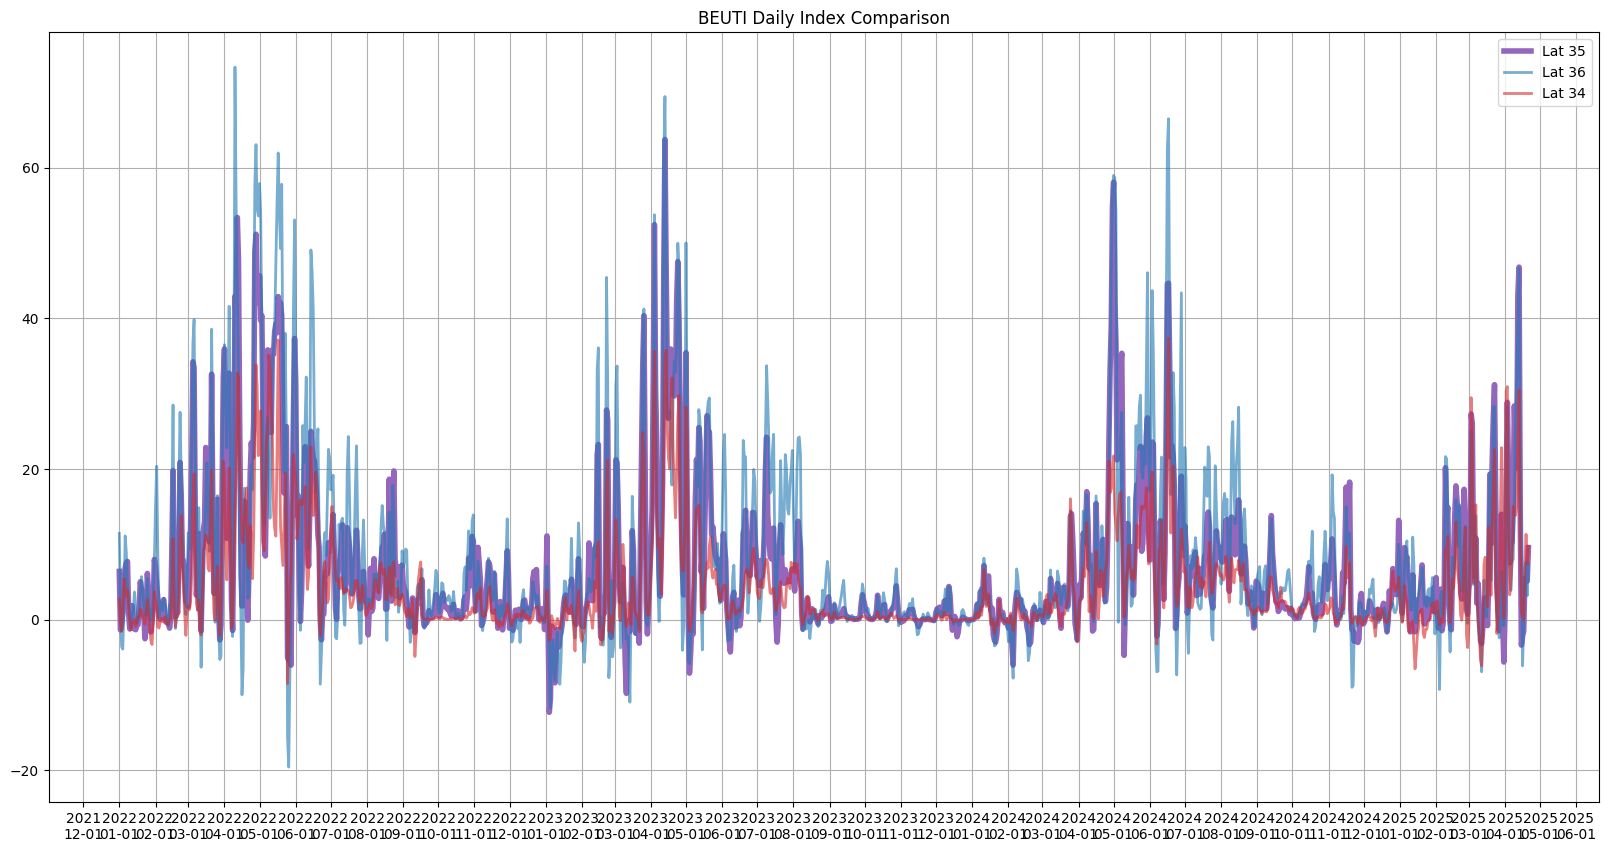

In [24]:
# find latitude 34, 35, 36

idx_34 = np.where(lat==34)[0][0]
idx_35 = np.where(lat==35)[0][0]
idx_36 = np.where(lat==36)[0][0]

b34 = beuti[:,idx_34]
b35 = beuti[:,idx_35]
b36 = beuti[:,idx_36]

# plot 

fig = plt.figure(figsize=(20,10))
plt.title('BEUTI Daily Index Comparison') 
plt.grid()
plt.plot(dates,b35,color='tab:purple',label='Lat 35',lw=4)
plt.plot(dates,b36,color='tab:blue',label='Lat 36',lw=2,alpha=0.6)

plt.plot(dates,b34,color='tab:red',label='Lat 34',lw=2,alpha=0.6)
myFmt = mdates.DateFormatter('%Y\n%m-%d')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(myFmt)
plt.legend()

plt.show()

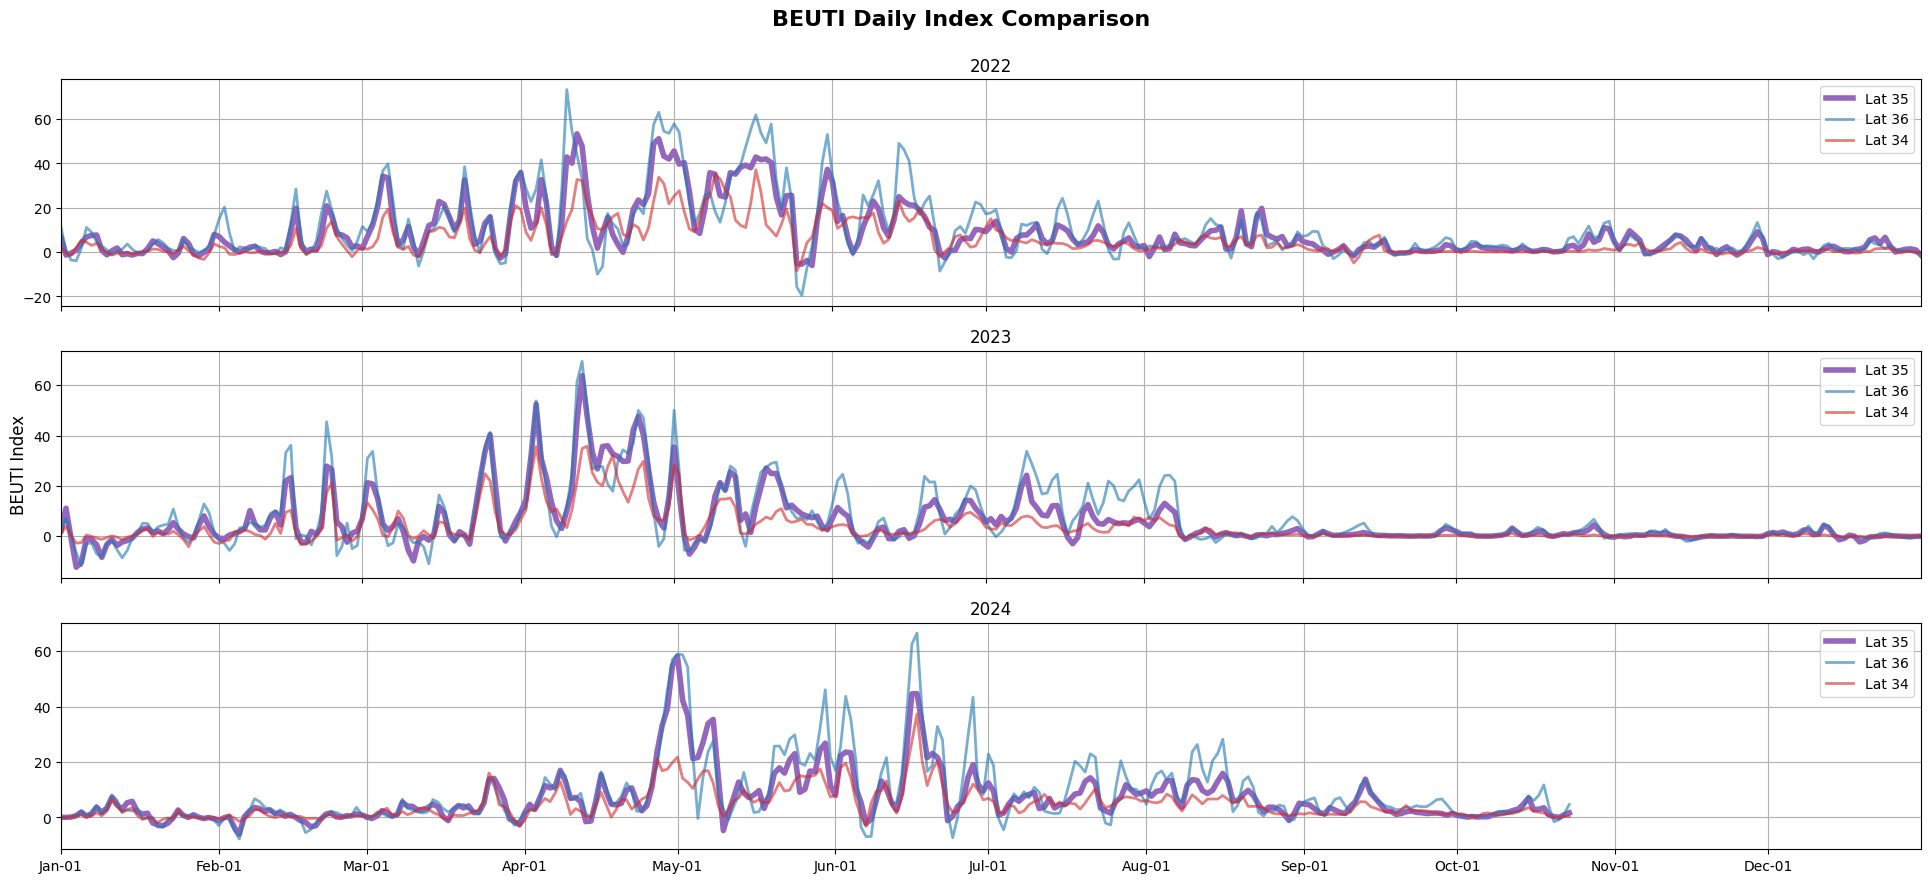

In [10]:
# split into years 

y2022 = np.where([dd.year == 2022 for dd in dates])[0] 
y2023 = np.where([dd.year == 2023 for dd in dates])[0] 
y2024 = np.where([dd.year == 2024 for dd in dates])[0] 


# plot 
myFmt = mdates.DateFormatter('%Y\n%m-%d')
myFmt = mdates.DateFormatter('%b-%d')

fig, axes = plt.subplots(3,1,figsize=(24,10))
plt.suptitle('BEUTI Daily Index Comparison',fontsize=16,y=0.95,fontweight='bold') 

ax = axes[0] 
ax.set_title('2022') 
ax.grid()
ax.plot(dates[y2022],b35[y2022],color='tab:purple',label='Lat 35',lw=4)
ax.plot(dates[y2022],b36[y2022],color='tab:blue',label='Lat 36',lw=2,alpha=0.6)
ax.plot(dates[y2022],b34[y2022],color='tab:red',label='Lat 34',lw=2,alpha=0.6)
ax.xaxis.set_major_locator(mdates.MonthLocator()); ax.xaxis.set_major_formatter(" ")
#ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
datemin = dt.datetime(2022,1,1); datemax = dt.datetime(2022,12,31)
ax.set_xlim(datemin, datemax)
ax.legend()

ax = axes[1] 
ax.set_title('2023') 
ax.grid()
ax.plot(dates[y2023],b35[y2023],color='tab:purple',label='Lat 35',lw=4)
ax.plot(dates[y2023],b36[y2023],color='tab:blue',label='Lat 36',lw=2,alpha=0.6)
ax.plot(dates[y2023],b34[y2023],color='tab:red',label='Lat 34',lw=2,alpha=0.6)
ax.xaxis.set_major_locator(mdates.MonthLocator()); ax.xaxis.set_major_formatter(" ")
datemin = dt.datetime(2023,1,1); datemax = dt.datetime(2023,12,31)
ax.set_xlim(datemin, datemax)
ax.set_ylabel('BEUTI Index',fontsize=12)
ax.legend()

ax = axes[2] 
ax.set_title('2024') 
ax.grid()
ax.plot(dates[y2024],b35[y2024],color='tab:purple',label='Lat 35',lw=4)
ax.plot(dates[y2024],b36[y2024],color='tab:blue',label='Lat 36',lw=2,alpha=0.6)
ax.plot(dates[y2024],b34[y2024],color='tab:red',label='Lat 34',lw=2,alpha=0.6)
ax.xaxis.set_major_locator(mdates.MonthLocator()); ax.xaxis.set_major_formatter(myFmt)
datemin = dt.datetime(2024,1,1); datemax = dt.datetime(2024,12,31)
ax.set_xlim(datemin, datemax)
ax.legend()

plt.show()



In [11]:
save_loc = '/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/figures/'
fig.savefig(save_loc+'beuti_lat=34-35-26_2022-2024.png',dpi=300)

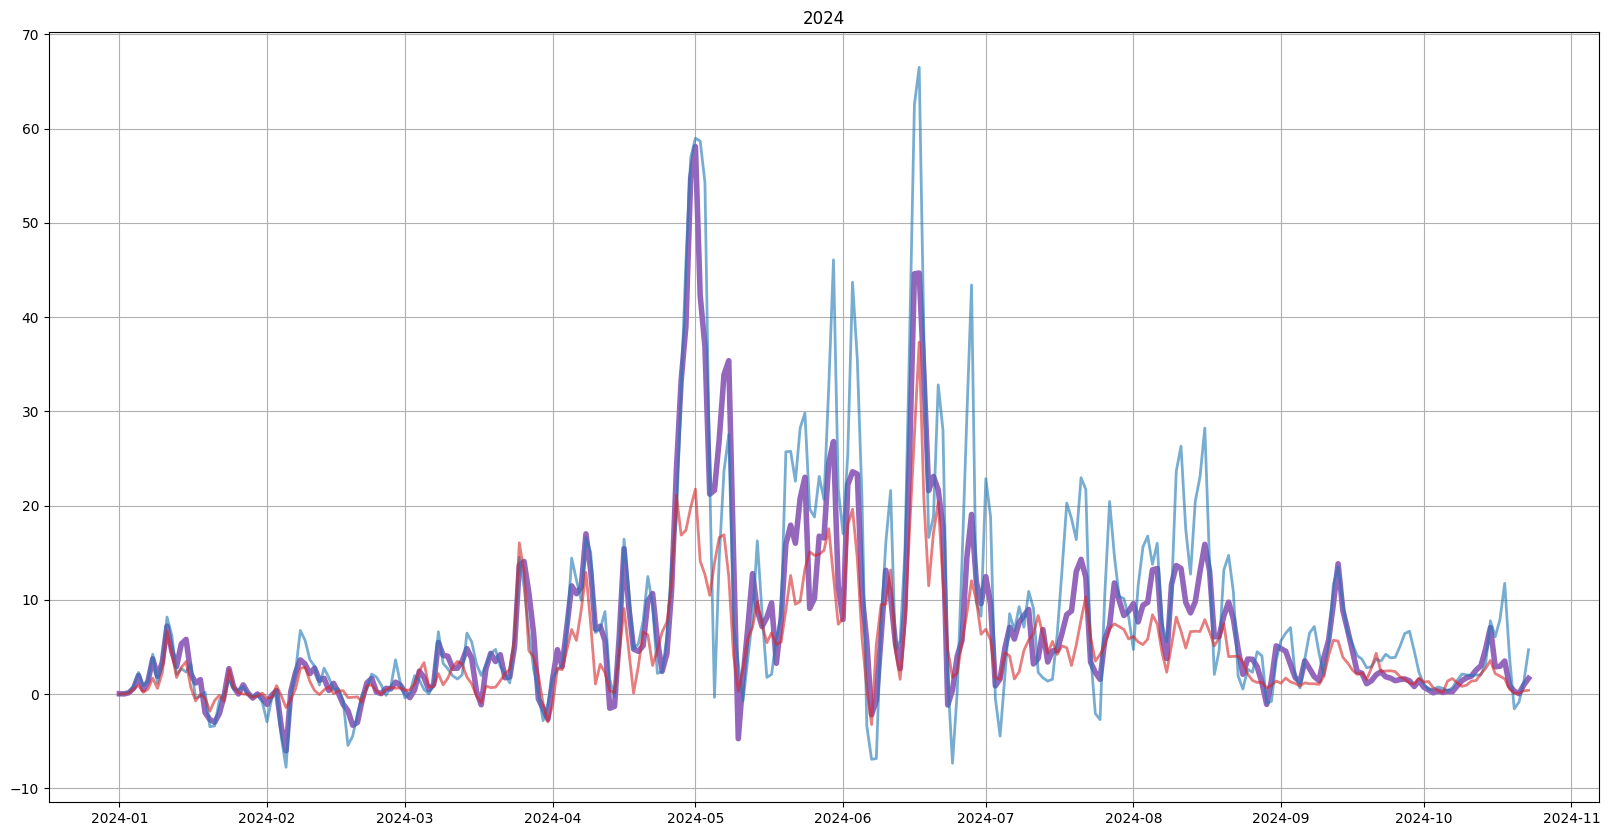

In [12]:
fig,ax = plt.subplots(figsize=(20,10))
ax.set_title('2024') 
ax.grid()
ax.plot(dates[y2024],b35[y2024],color='tab:purple',label='Lat 35',lw=4)
ax.plot(dates[y2024],b36[y2024],color='tab:blue',label='Lat 36',lw=2,alpha=0.6)
ax.plot(dates[y2024],b34[y2024],color='tab:red',label='Lat 34',lw=2,alpha=0.6)

In [13]:
pwd

'/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia'

In [14]:
save_loc = '/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/figures/'
fig.savefig(save_loc+'beuti_lat=34-35-26_2022-2024.png',dpi=300)

In [15]:
y2024 = np.where([dd.year == 2024 for dd in dates])[0] 
y2024

array([ 730,  731,  732,  733,  734,  735,  736,  737,  738,  739,  740,
        741,  742,  743,  744,  745,  746,  747,  748,  749,  750,  751,
        752,  753,  754,  755,  756,  757,  758,  759,  760,  761,  762,
        763,  764,  765,  766,  767,  768,  769,  770,  771,  772,  773,
        774,  775,  776,  777,  778,  779,  780,  781,  782,  783,  784,
        785,  786,  787,  788,  789,  790,  791,  792,  793,  794,  795,
        796,  797,  798,  799,  800,  801,  802,  803,  804,  805,  806,
        807,  808,  809,  810,  811,  812,  813,  814,  815,  816,  817,
        818,  819,  820,  821,  822,  823,  824,  825,  826,  827,  828,
        829,  830,  831,  832,  833,  834,  835,  836,  837,  838,  839,
        840,  841,  842,  843,  844,  845,  846,  847,  848,  849,  850,
        851,  852,  853,  854,  855,  856,  857,  858,  859,  860,  861,
        862,  863,  864,  865,  866,  867,  868,  869,  870,  871,  872,
        873,  874,  875,  876,  877,  878,  879,  8

In [16]:
time[idx].shape

IndexError: index 12419 is out of bounds for axis 0 with size 1027

In [ ]:


idx = np.where([dd.year > 2021 for dd in dates])[0] 

time = time[idx]
dates = dates[idx]
beuti = BEUTI[idx,:]

In [ ]:
dates[-1]